
    
# Маркетинговый анализ развлекательного приложения Procrastinate Pro+ 



 
# Содержание
    
**1 [Загрузите данные и подготовьте их к анализу](#1)**

**1.1 [ Предобработка данных в таблице 'visits'](#11)**

**1.2 [ Предобработка данных в таблице 'orders'](#12)**

**2 [Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии](#2)**

**2.1  [Функция для построения профилей](#21)**

**2.2  [Функция для расчета коэффициента удержания 'Retention Rate'](#22)**

**2.3  [Функция для расчета конверсии 'Conversion Rate](#23)**

**2.4  [Функция для расчета LTE и ROI](#24)**

**3  [Исследовательский анализ данных](#3)**

**3.1  [Профили посетителей](#31)**

**3.1.1  [Распределение посетителей по источникам привлечения](#311)**

**3.1.2  [Распределение посетителей по странам](#312)**

**3.1.3  [Распределение посетителей в зависимости от вида устройства с которого они совершают вход и покупки](#313)**

**4 [Маркетинг](#4)**

**5 [Окупаемость рекламы для привлечения пользователей](#5)**

**5.1 [Общая окупаемость рекламы](#51)**

**5.2 [Окупаемость рекламы с разбивкой по устройствам](#52)**

**5.3 [Окупаемость рекламы с разбивкой по странам](#53)**

**5.4 [Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам](#54)**

**6 [Конверсия с разбивкой по устройствам, странам, рекламным каналам](#6)**

**6.1 [Конверсия с разбивкой по устройствам](#61)**

**6.2 [Конверсия по регионам](#62)**

**6.3 [ККонверсия по каналам привлечения](#63)**

**7 [Удержание с разбивкой по устройствам, странам, рекламным каналам](#7)**

**7.1 [Удержание с разбивкой по устройствам, странам, рекламным каналам](#71)**

**7.2 [Удержание по регионам](#72)**

**7.3 [Удержание по каналам привлечения](#73)**

**8 [Выводы](#8)**



<a id='1'></a>
##  Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
costs=pd.read_csv('/datasets/costs_info_short.csv')

<a id='11'></a>
### Предобработка данных в таблице 'visits'

In [3]:
visits.info()
display(visits.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

**Примечание:** При оценке качества представленных данных выявлено: 
1. Неудобное наименование столбцов (с пробелами и заглавными буквами). 
2. Данные, представленные в столбцах "Session Start" и "Session End"   необходимо перевести в формат времени. 
3. После приведения заголовков к нужному формату, проверим данные на наличие дубликатов (оценим, есть ли строки, где совпадают индивидуальный номер пользователя, время начала и время окончания сессии, так как сочитание этих данных точно не может повторяться).
4. Проверим наличие дубликатов в столбцах с названиями стран, идентификаторами источника рекламы и устройства с которого был выполнен вход - вызовем все уникальные значения в этих столбцах, отсортированные в алфавитном порядке. При выявлении неявных дубликатов произведем замену на удобный синоним. 

In [4]:
visits.columns=visits.columns.str.lower()
visits= visits.rename(columns={'user id': 'user_id',
                               'session start': 'session_start',
                               'session end': 'session_end'})

print('Количество явных дубликатов в данных:',
      visits.duplicated(subset=['user_id',
                                'session_start',
                                'session_end']).sum())


print('Уникальные значения в названиях стран:',
      visits['region'].sort_values().unique())
print('Уникальные значения в названиях устройств:',
      visits['device'].sort_values().unique())
print('Уникальные значения в названиях устройств:',
      visits['channel'].sort_values().unique())   

Количество явных дубликатов в данных: 0
Уникальные значения в названиях стран: ['France' 'Germany' 'UK' 'United States']
Уникальные значения в названиях устройств: ['Android' 'Mac' 'PC' 'iPhone']
Уникальные значения в названиях устройств: ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']


Дубликаты не обнаружны, но для удобства я предлагаю заменить 'United States' на 'USA'.

In [5]:
visits['region']=visits['region'].replace("United States", "USA")
print('Уникальные значения в названиях стран:',
      visits['region'].sort_values().unique())

Уникальные значения в названиях стран: ['France' 'Germany' 'UK' 'USA']


<a id='12'></a>
### Предобработка данных в таблице 'orders'

In [6]:
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

**Примечание:** При оценке качества представленных данных выявлено: 
1. Неудобное наименование столбцов (с пробелами и заглавными буквами). 
2. Данные, представленные в столбце "Event Dt"  необходимо перевести в формат времени. 
3. После приведения заголовков к нужному формату, проверим данные на наличие дубликатов (соответствие по всем столбцам).

In [7]:
orders.columns=orders.columns.str.lower()
orders= orders.rename(columns={'user id': 'user_id',
                               'event dt': 'event_dt'})
print('Количество явных дубликатов в данных:', orders.duplicated().sum())

Количество явных дубликатов в данных: 0


<a id='13'></a>
### Предобработка данных в таблице 'costs'

In [8]:
costs.info()
display(costs.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

**Примечание:** При оценке качества представленных данных выявлено: 
1. Неудобное наименование столбцов (c заглавными буквами). 
2. Данные, представленные в столбце "dt"  необходимо перевести в формат времени. 
3. После приведения заголовков к нужному формату, проверим данные на наличие дубликатов (соответствие по всем столбцам).

In [9]:
costs.columns=costs.columns.str.lower()
costs.info()
print('Количество явных дубликатов в данных:',
      costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
Количество явных дубликатов в данных: 0


<a id='14'></a>
### Перевод данных с датами из формата в "object" в формат "datetime"

In [10]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
orders['event_dt']=pd.to_datetime(orders['event_dt'])
costs['dt']=pd.to_datetime(costs['dt']).dt.date

<a id='2'></a>
## Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

<a id='21'></a>
### Функция для построения профилей

In [11]:
def get_profiles(visits, orders, costs):
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

       
    new_users = (profiles.groupby(['dt', 'channel']).
                 agg({'user_id': 'nunique'})
                 .rename(columns={'user_id': 'unique_users'})
                 .reset_index()
                )

    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles

<a id='22'></a>
### Функция для расчета коэффициента удержания 'Retention Rate'

In [12]:

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
   
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) 
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   
        result = result.div(result['cohort_size'], axis = 0)                                                     
        result = result[['cohort_size'] + list(range(horizon_days))]                                            
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time


def ret(x):
    retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, 14, dimensions=[x]
    )
    plt.figure(figsize=(20, 6)) # задаём размер сетки для графиков

    for i, payer in enumerate(profiles['payer'].unique()):
        sns.heatmap(
        retention.query('payer == @payer')
        # удаляем payer из индексов, чтобы не загромождать графики
        .droplevel('payer')
        # исключаем размеры когорт и удержание первого дня
        .drop(columns=['cohort_size', 0]),
        # добавляем подписи значений
        annot=True,
        # переводим значения в проценты
        fmt='.2%',
        # строим каждый график в своей ячейке
        ax=plt.subplot(1, 2, i + 1),
        )
        # задаём названия графиков с учётом значения payer
        plt.title('Тепловая карта удержания для payer = {}'.format(payer))

        plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
       
    

    
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<a id='23'></a>
### Функция для расчета конверсии 'Conversion Rate'

In [13]:
def get_conversion(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



<a id='24'></a>
### Функция для расчета LTE и ROI

In [14]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


<a id='3'></a>
## Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

<a id='31'></a>
### Построим профили посетителей

In [15]:
profiles = get_profiles(visits, orders, costs)

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print('Минимальная дата привлечения:', min_date, 
     '\nМаксимальная дата привлечения:', max_date)


Минимальная дата привлечения: 2019-05-01 
Максимальная дата привлечения: 2019-10-27


<a id='311'></a>
#### Распределение посетителей по источникам привлечения

Оценим количество привлечённых каждым источником посетителей. Для этого напишем функцию в которой сгруппируем  профили по рекламному каналу (другому признаку) и посчитаем количество уникальных пользователей. Для снижения "визуального шума" отфильтруем данные перед тем, как построим график. 

channel  user_id     payer
0              organic    56439  0.020553
1             FaceBoom    29144  0.122049
2               TipTop    19561  0.096007
3   OppleCreativeMedia     8605  0.027077
4              LeapBob     8553  0.030633
5       WahooNetBanner     8553  0.052964
6       RocketSuperAds     4448  0.079137
7         MediaTornado     4364  0.035747
8              YRabbit     4312  0.038265
9           AdNonSense     3880  0.113402
10      lambdaMediaAds     2149  0.104700

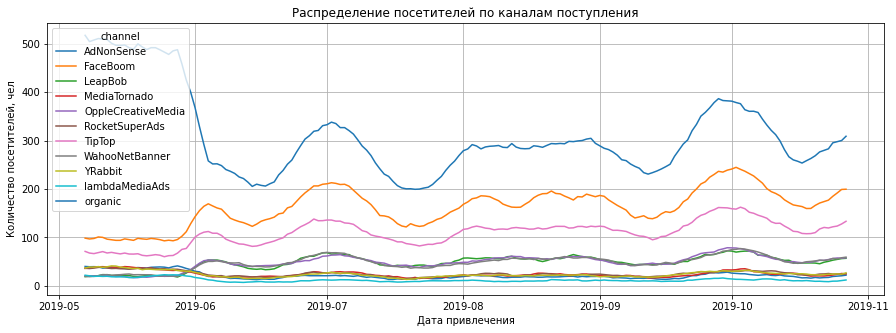

In [16]:
def filter_data(df, window):
    
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

window=7

def sign (x, y):
    a=(
        profiles.groupby(x).agg({'user_id': 'nunique',
                                 'payer': 'mean'})
        .sort_values(by='user_id', ascending=False)
        )    
    filtered_data=profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns=x,  # признак
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
    )
    a=a.reset_index()
   
    display(a)
    filter_data(filtered_data, window).plot(figsize=(15, 5), grid=True)
    plt.xlabel('Дата привлечения')  # название оси X
    plt.ylabel('Количество посетителей, чел') 
    plt.title(y)
    return plt.show()

sign ('channel', 'Распределение посетителей по каналам поступления')




**Вывод** Как мы видим, за весь период наблюдения основным источником привлечения являлся 'organic', при этом наибольшее количество пользоватей из этого источника было привлечено в мае 2016 года. На втором и третьем местах по количеству привлеченных пользователей - 'FaceBoom'  и 'TipTop'  соответсвенно. При этом динамика привлечения пользователей по этим двум источникам схожа, рост количества привлеченных пользователей начинает увеличиваться с июня 2019 года и далее находится примерно на одном уровне. По доле покупателей из общего  числа пользователей на первом месте FaceBoom (12% покупателей из всех посетителей), AdNonSense - 11%, lambdaMediaAds- 10%, TipTop -9,6%. Но говорить по экстенсивным показателям какой из источников приносит больше покупателей нельзя. Посчитаем количество покупателей по каждому источнику привлечения.

Оценим распреление по источникам привлечения только тех посетителей, которые стали покупателями. Для этого напишем аналогичную функцию, только для посетителей со значением 'payer'=True

channel  user_id
0             FaceBoom     3557
1               TipTop     1878
2              organic     1160
3       WahooNetBanner      453
4           AdNonSense      440
5       RocketSuperAds      352
6              LeapBob      262
7   OppleCreativeMedia      233
8       lambdaMediaAds      225
9              YRabbit      165
10        MediaTornado      156

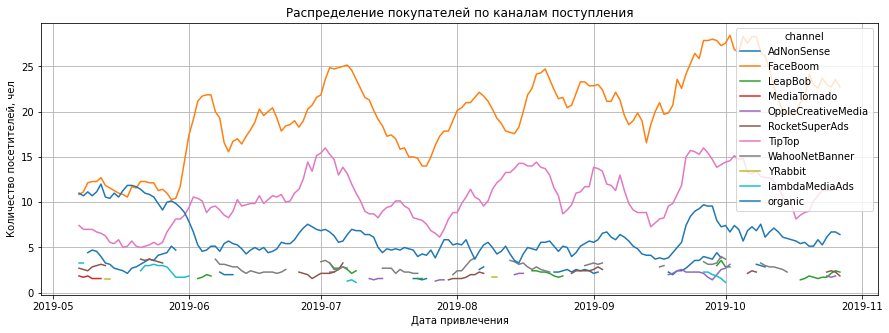

In [17]:
payers= profiles.query('payer==True')
def sign_payer (x, y):
    a=(
        payers.groupby(x).agg({'user_id': 'nunique'})
        .sort_values(by='user_id', ascending=False)
        )  
    filtered_data=payers.pivot_table(
    index='dt',  # даты первых посещений
    columns=x,  # признак
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
    )
    a=a.reset_index()
    
    display(a)
    filter_data(filtered_data, window).plot(figsize=(15, 5), grid=True)
    plt.xlabel('Дата привлечения')  # название оси X
    plt.ylabel('Количество посетителей, чел') 
    plt.title(y)
    return plt.show()




sign_payer ('channel', 'Распределение покупателей по каналам поступления')

**Вывод** Основной источник привлечения **покупателей** - 'FaceBoom' (40% от всех привлеченных покупателей), при этом количество привлеченных покупателей начинает увеличиваться с июня 2019 года. На втором месте по количеству привлеченных покупателей 'TipTop' (21% от всех привлеченных покупателей)- наибольший рост количества привлеченных покупателей приходится на сентябрь 2019 года. По этим двум источникам мы также видим некоторое снижение привлечения в июле 2019 года. На третьем месте 'organic' - 13,1% от всех привлеченных покупателей.

<a id='312'></a>
#### Распределение посетителей по странам

Аналогично оценим распределение посетителей и покупателей по странам. 

region  user_id     payer
0      USA   100002  0.069019
1       UK    17575  0.039829
2   France    17450  0.037994
3  Germany    14981  0.041119

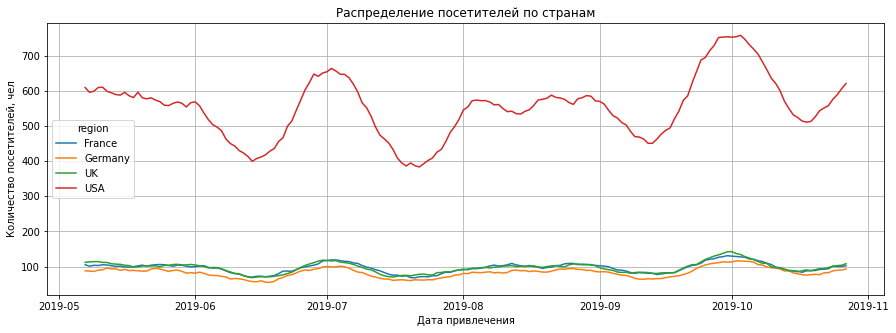

In [18]:
sign ('region', 'Распределение посетителей по странам')

**Вывод** Наибольшее количество посетителей проживает в их количество значительно превышает количество посетителей из других стран (более чем в 5 раз). Количество посетителей из Великобритании, Франции  и Германии  примерно равно. В США - покупателями становятся 7% посетителей, в странах Европы (Великобритании, Франции  и Германии) эти показатели примерно равны и составляют около 4%.  

region  user_id
0      USA     6902
1       UK      700
2   France      663
3  Germany      616

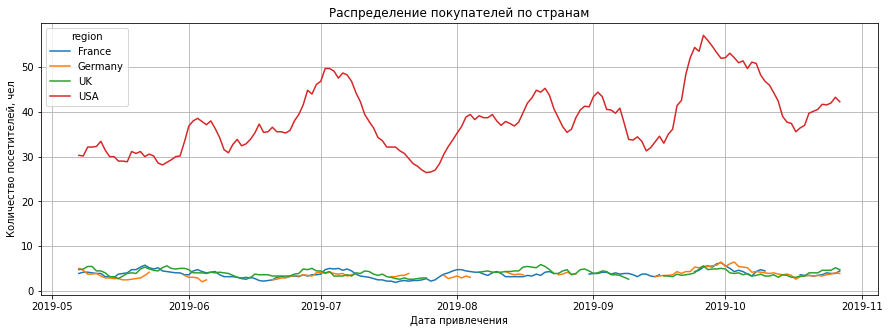

In [19]:
sign_payer('region', 'Распределение покупателей по странам')

**Вывод:** Картина распределения покупателей по странам схожа с картиной распределения посетителей. Наибольшее количество покупателей  проживает в США (77,7%). 

<a id='313'></a>
#### Распределение посетителей в зависимости от вида устройства с которого они совершают вход и покупки. 

device  user_id     payer
0   iPhone    54479  0.062079
1  Android    35032  0.058518
2       PC    30455  0.050468
3      Mac    30042  0.063644

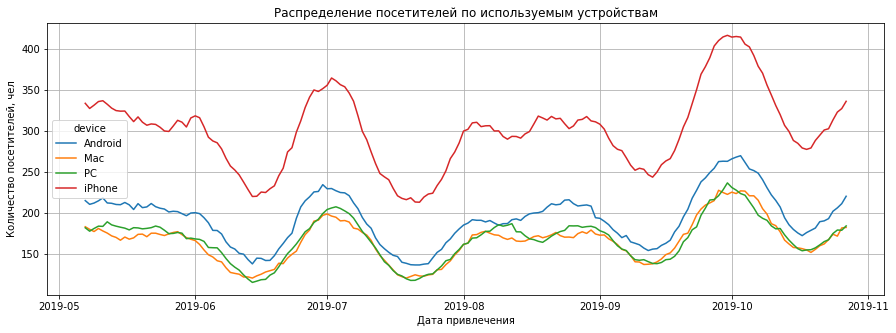

In [20]:
sign('device', 'Распределение посетителей по используемым устройствам')

**Вывод:** Наибольшее количество пользователей используют для входа 'iPhone' . Количество посетителей, испольщующих 'Mac', 'PC', 'Android' примерно равно. Среди пользователей PC покупателями становятся 5% посетителей. Среди пользователей Mac, iPhone, Android покупателями становятся около 6% посетителей.

device  user_id
0   iPhone     3382
1  Android     2050
2      Mac     1912
3       PC     1537

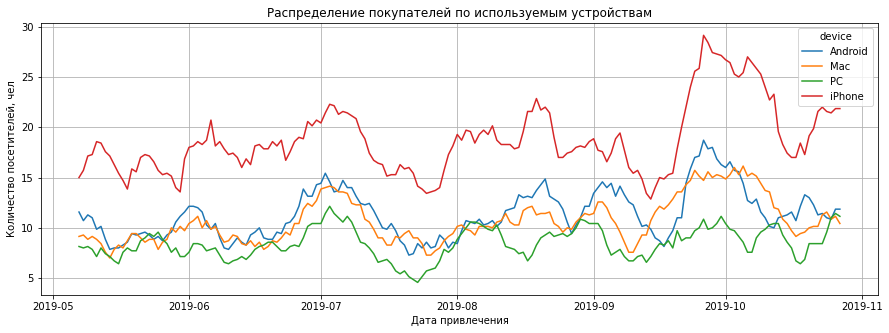

In [21]:
sign_payer('device', 'Распределение покупателей по используемым устройствам')

**Вывод** Количество **покупателей** использующих для покупок 'iPhone' больше, чем пользователей использующих другие устройства, Количество покупателей, испольщующих 'Mac', 'PC', 'Android' примерно равно.  

<a id='4'></a>
## Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [22]:
print('Всего за период наблюдения было потрачено на рекламу:',
      costs['costs'].sum().astype('int'))

Всего за период наблюдения было потрачено на рекламу: 105497


Для оценки трат на каждый источник привлечения сгруппируем данные по источнику и посчитаем общее количество затраченных средств. 

In [23]:

n=(costs.groupby('channel')
   .agg({'costs': 'sum'})
   .sort_values(by='costs'
                , ascending=False)
   .reset_index()
  )
display(n)
n=n.loc[0:1,'costs'].sum()/n['costs'].sum()*100

print(f'Доля рекламного бюджета потраченная на площадках TipTop и FaceBoom: {n:.0f}%')  

channel     costs
0              TipTop  54751.30
1            FaceBoom  32445.60
2      WahooNetBanner   5151.00
3          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6             LeapBob   1797.60
7      lambdaMediaAds   1557.60
8        MediaTornado    954.48
9             YRabbit    944.22

Доля рекламного бюджета потраченная на площадках TipTop и FaceBoom: 83%


**Вывод** Наибольшая сумма была вложена в рекламу на площадке TipTop, на втором месте по затратам FaceBoom. На рекламу на этих двух площадках было потрачено более 80% всего рекламного бюджета.  

Оценим траты на рекламу по дням:


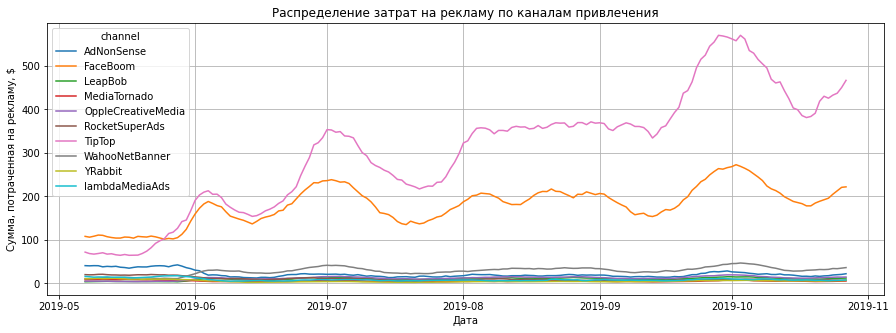

In [24]:
n=(
    costs.groupby(['channel', 'dt'],  axis=0)
    .agg({'costs': 'sum'})
    .sort_values(by='dt'
                 , ascending=False)
    .reset_index()
    ) 
filtered_data=n.pivot_table(
    index='dt',  
    columns='channel',  
    values='costs',  
    aggfunc='sum'  
    )
filter_data(filtered_data, window).plot(figsize=(15, 5), grid=True)
plt.xlabel('Дата')  # название оси X
plt.ylabel('Сумма, потраченная на рекламу, $') 
plt.title('Распределение затрат на рекламу по каналам привлечения')
plt.show()
 

**Вывод:** Как мы уже выяснили ранее, наибольшие траты пришлись на рекламу на площадках TipTop и FaceBoom. В течение периода наблюдения траты распределены неравномерно. Так мы видим, увеличение вложений в рекламу на площадках TipTop и FaceBoom происходило 'параллельно' и началось с июня 2019 года, достигнув максимума в начале октября с последующим небольшим снижением. 

Для расчета CAC (Customer Aqcuisition Cost)  

[Воспользуемся функцией get_ltv](#24)


Перед расчетом показателей установим горизонт наблюдений - 14 дней, определим последнюю дату наблюдения, как максимальную дату привлечения. 

In [25]:
observation_date=datetime(2019,11,1).date()
print(observation_date)


2019-11-01


In [26]:
profiles = get_profiles(visits, orders,  costs)
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
  profiles,
  orders,
  observation_date,
  14,
  dimensions=[],
  ignore_horizon=False)

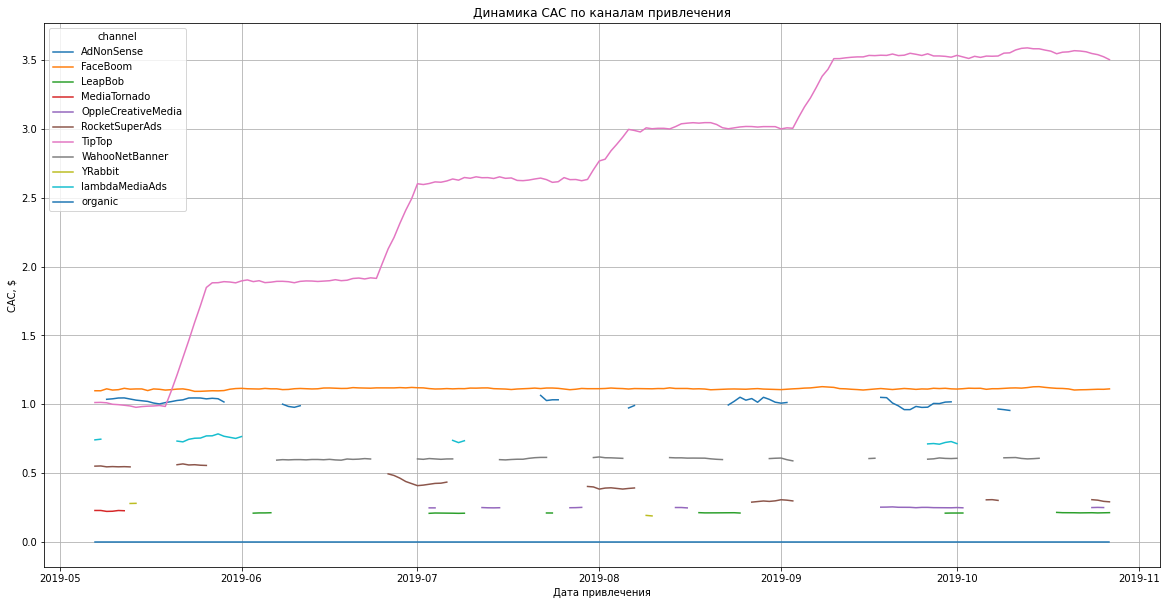

In [27]:
filtered_data=profiles.query('payer==True').pivot_table(
    index='dt',
    columns='channel',
    values='acquisition_cost',
    aggfunc='mean'
)


filter_data(filtered_data, window).plot(figsize=(20, 10), grid=True)
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')

plt.show()
print()




In [28]:
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .round(2)
    .sort_values(by='cac', ascending=False)
)
n=profiles.query('channel!="organic"')
n=n['acquisition_cost'].mean()
print(f'Средняя стоимость привлечения: {n:.1f} доллар')

cac

Средняя стоимость привлечения: 1.1 доллар


cac
channel                 
TipTop              2.80
FaceBoom            1.11
AdNonSense          1.01
lambdaMediaAds      0.72
WahooNetBanner      0.60
RocketSuperAds      0.41
OppleCreativeMedia  0.25
MediaTornado        0.22
YRabbit             0.22
LeapBob             0.21
organic             0.00

**Вывод** Стоимость привлечения «органических» покупателей  равна нулю, потому что они перешли на в приложение самостоятельно, а не благодаря рекламе. Привлечение одного покупателя из рекламной кампании в  TipTop обошлось компании дороже всего от 1 до 3,5 долларов (среднее значение 2,8 доллара - в 2,5 раза выше,чем средний САС), при этом цена постепенно росла от месяца к месяцу. Стоимость привлечения 1 покупателя в рекламных кампаниях на других площадках была стабильной за все время наблюдения. Так на площадках FaceBoom и AdNonSense средняя стоимость привлечения одного покупателя составила примерно 1 доллар. На площадках LambdaMediaAds - 72 цента, WahooNetBanner - 60 центов. На остальных - не превышала  50 центов. 


<a id='5'></a>
## Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

<a id='51'></a>
### Проанализируйте общую окупаемость рекламы

Для этого расчете показателей LTV (Lifetime value), CAC (Customer Aqcuisition Cost) и ROI (Return on investment). 

Используем данные полученные применением [функции get_ltv](#24)

Для оценки общей окупаемости не будем определять параметр dimensions.


In [29]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
  profiles,
  orders,
  observation_date,
  14,
  dimensions=[],
  ignore_horizon=False)
profiles=profiles.query('channel!="organic"')

cohort_size      0.0       1.0       2.0      3.0       4.0  \
cohort                                                                   
All users        88644  0.34558  0.435754  0.504507  0.56109  0.611436   

                5.0      6.0       7.0       8.0       9.0      10.0     11.0  \
cohort                                                                          
All users  0.654368  0.69414  0.729778  0.764619  0.796665  0.826152  0.85207   

               12.0     13.0  
cohort                        
All users  0.878116  0.90203

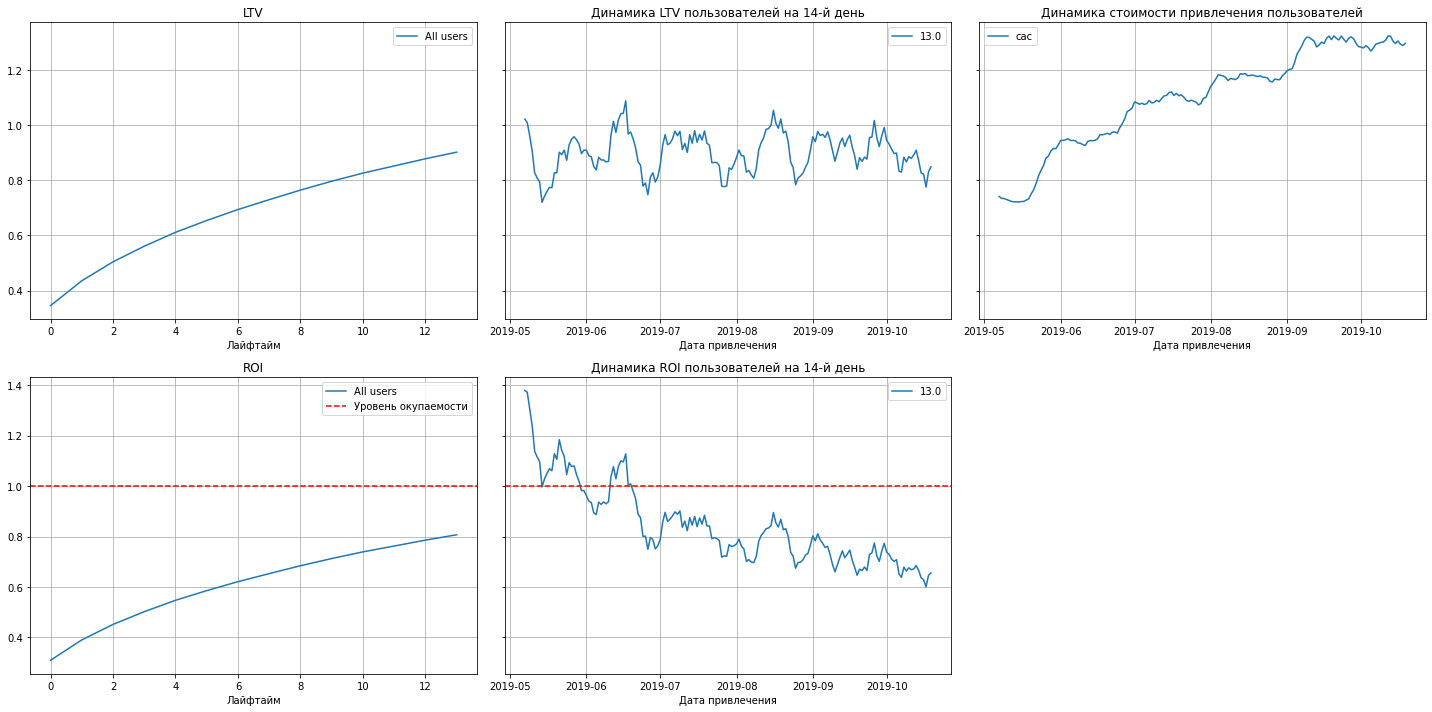

In [30]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
  profiles,
  orders,
  observation_date,
  14,
  dimensions=[],
  ignore_horizon=False)
# таблица LTV
display(ltv)





# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

Недельный LTV пользователей составил 54 цента, 14 дневный LTV составил 68 центов. 
Стоимость привлечения растет от мая к октябрю. Затраты на рекламу не окупаются. ROI затрат на привлечение покупателя на 14 день снижается от мая к октябрю и затраты перестают окупаться уже со второй половины июня. 


График динамики ROI показывает, что реклама не окупается. 



Проанализируем окупаемость рекламы с разбивкой по устройствам

<a id='52'></a>
### Проанализируйте окупаемость рекламы с разбивкой по устройствам

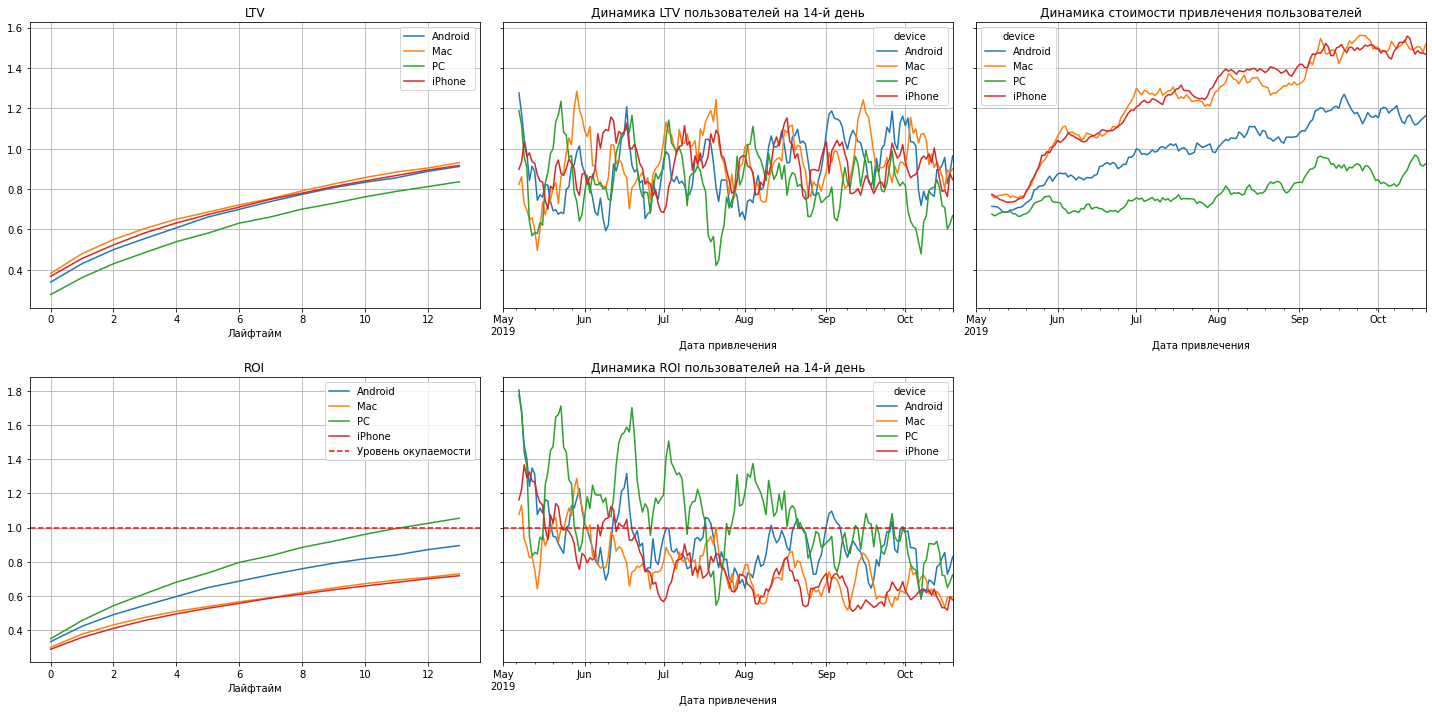

In [31]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
  profiles,
  orders,
  observation_date,
  14,
  dimensions=['device'],
  ignore_horizon=False)
profiles=profiles.query('channel!="organic"')
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

**Вывод:** Самая низкая ROI у пользователей IPhone и Mac, при этом ROI превышает уровень окупаемости только для пользователей PC с мая по сентябрь. ROI пользователей других устройств не превышает уровень окупаемости с августа.

<a id='53'></a>
### Проанализируйте окупаемость рекламы с разбивкой по странам

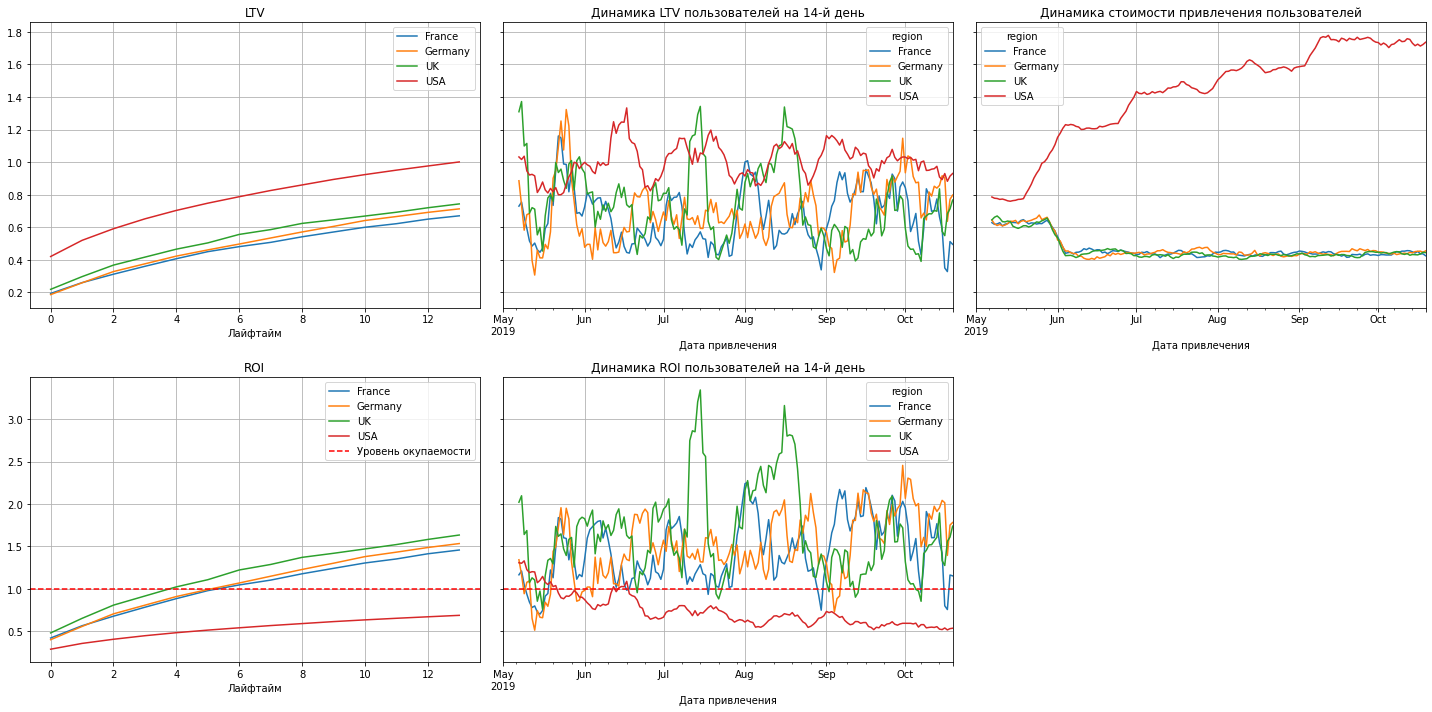

In [32]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
  profiles,
  orders,
  observation_date,
  14,
  dimensions=['region'],
  ignore_horizon=False)
profiles=profiles.query('channel!="organic"')
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

**Вывод:** Единственный регион, где реклама не окупается совсем - США. 

<a id='54'></a>
### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [ ]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv(
  profiles,
  orders,
  observation_date,
  14,
  dimensions=['channel'],
  ignore_horizon=False)
profiles=profiles.query('channel!="organic"')
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 


**Вывод:**  Относительно чаще других окупается реклама на площадках YRabbit и MediaTornado.   Реклама на площадках FaceBoom и TipTop не окупается совсем. 

<a id='6'></a>
## Изучим конверсию  с разбивкой по устройствам, странам, рекламным каналам

Для расчета конверсии воспользуемся [функцией get_conversion](#23)


<a id='61'></a>
### Конверсия по устройствам

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    14,
    dimensions=['device'],
    ignore_horizon=False)
plot_conversion(conversion, conversion_history, 14) 

**Вывод:** Двухнедельная конверсия не превышает 7%. Наименьшая конверсия у пользователей РС. Набольшая у пользователей IPhone и Mac.

<a id='62'></a>
### Конверсия по регионам

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    14,
    dimensions=['region'],
    ignore_horizon=False
)
plot_conversion(conversion, conversion_history, 14) 

**Вывод:** Самая высокая конверсия у пользователей в США. Среди пользователей в Европе двухнедельная конверсия не превышает 6%.

<a id='63'></a>
### Конверсия по каналам привлечения

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    14,
    dimensions=['channel'],
    ignore_horizon=False
)
plot_conversion(conversion, conversion_history, 14) 

**Вывод:**  Самая высокая у пользователей с FaceBoom - 11,9%. Далее по убыванию - AdNonSense - 10,75% и LambdaMediaAds - 10,36%, TipTop - 9,37%.

<a id='7'></a>
## Изучим  удержание с разбивкой по устройствам, странам, рекламным каналам

Для оценки удержания воспользуемся [функцией get_retention](#22) Построим тепловые карты удержания для посетителей и покупателей и кривые удержания для покупателей. 

<a id='71'></a>
### Удержание по устройствам 

In [ ]:

retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    14,
    dimensions=['device']
    ) 

ret('device')
plot_retention(retention, retention_history, 14) 

**Вывод:** Удержание неплатящих пользователей менее 5% уже на 4 день. Среди пользователей, делающих покупки в приложении удержание на 13 день около 10%, снижается равномерно. Удержание платящих пользователей выше у пользователей PS - 12,4%, ниже всего у пользователей iPhone - 9,2%. При этом мы видим  снижение удержания платящих пользователей на Mac и PC с августа. 

<a id='72'></a>
### Удержание по регионам

In [ ]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    14,
    dimensions=['region']
    )
ret('region')


plot_retention(retention, retention_history, 14) 

**Вывод:**   Наихудшие показателиудержания у пользователей из США - на 14 день продолжают пользоваться приложением всего 9%. Лучший показатель - у покупателей из Великобритании и Франции- 19-20%. 

<a id='73'></a>
### Удержание по каналам привлечения

In [ ]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    14,
    dimensions=['channel']
    )
ret('channel')
plot_retention(retention, retention_history, 14) 

**Вывод:** Наихудшие показатели удержания у площадок FaceBoom - на 14 день приложением пользуются менее 2% покупателей. Наилучший у WahooNetBanner 22,9%. 

## Выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

1. Основная причина неэффективности привлечения пользователей - не был проведен анализ конверсии и удержания. Например, деньги вкладывались в рекламу на площадки FaceBoom (вторая по затрам на рекламу) с наименьшими показателями удержания. Так же обращают на себя внимание в целом невысокие показатели удержания для приложения, особенно для пользователей на iPhone и MAC.  

2. Необходимо детально изучить маркетинговую воронку и выяснить причины низкой конверсии (на каком этапе происходит сбой). 

3. Если это не сделано ранее, возможно введение в приложение функции с запросом на обратную связь от пользователя при попытке удалить приложение или длительном его неиспользовании с целью выяснения причин низкого удержания. 

4. Также опрометчиво было увеличивать затраты на рекламу в FaceBoom и TipTop, не оценив ее окупаемость на этих площадках. За все время наблюдения реклама на этих площадках не окупилась ни разу. 

5. Можно предположить, что в августе произошли события, повлиявшие на снижение конверсии и удержания у пользователей Mac и iPhone. Необходимо выяснить, не изменилось ли что-нибудь в приложении для пользователей этих устройств. 